# House Prices - Advanced Regression Techniques

## Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm

from scipy import stats

## Global config

In [2]:
train_csv = "train.csv"
test_csv = "test.csv"

## Load data

In [3]:
train_data = pd.read_csv(train_csv)
test_data = pd.read_csv(test_csv)

## Data Exploration

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Numerical feature distribution

In [8]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


### Categorical feature distribution

In [10]:
train_data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [11]:
test_data.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


### Null values analysis

In [12]:
train_data.info()
print('_'*42)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data dictionary

#### Categorical

- MSZoning: Identifies the general zoning classification of the sale.
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to various conditions
- Condition2: Proximity to various conditions (if more than one is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- ExterQual: Evaluates the quality of the material on the exterior 
- ExterCond: Evaluates the present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinType2: Rating of basement finished area (if multiple types)
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- KitchenQual: Kitchen quality
- Functional: Home functionality (Assume typical unless deductions are warranted)
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageFinish: Interior finish of the garage
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- SaleType: Type of sale
- SaleCondition: Condition of sale

#### Ordinal

- MSSubClass: Identifies the type of dwelling involved in the sale.	
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house

#### Discrete

- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Fireplaces: Number of fireplaces
- GarageCars: Size of garage in car capacity
- MoSold: Month Sold (MM)

#### Continuous

- LotFrontage: Linear feet of street connected to property		
- LotArea: Lot size in square feet	
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- MasVnrArea: Masonry veneer area in square feet
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area		
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- GarageYrBlt: Year garage was built
- GarageArea: Size of garage in square feet
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- MiscVal: Value of miscellaneous feature
- YrSold: Year Sold (YYYY)

#### Mixed

### Feature correlation

<AxesSubplot:>

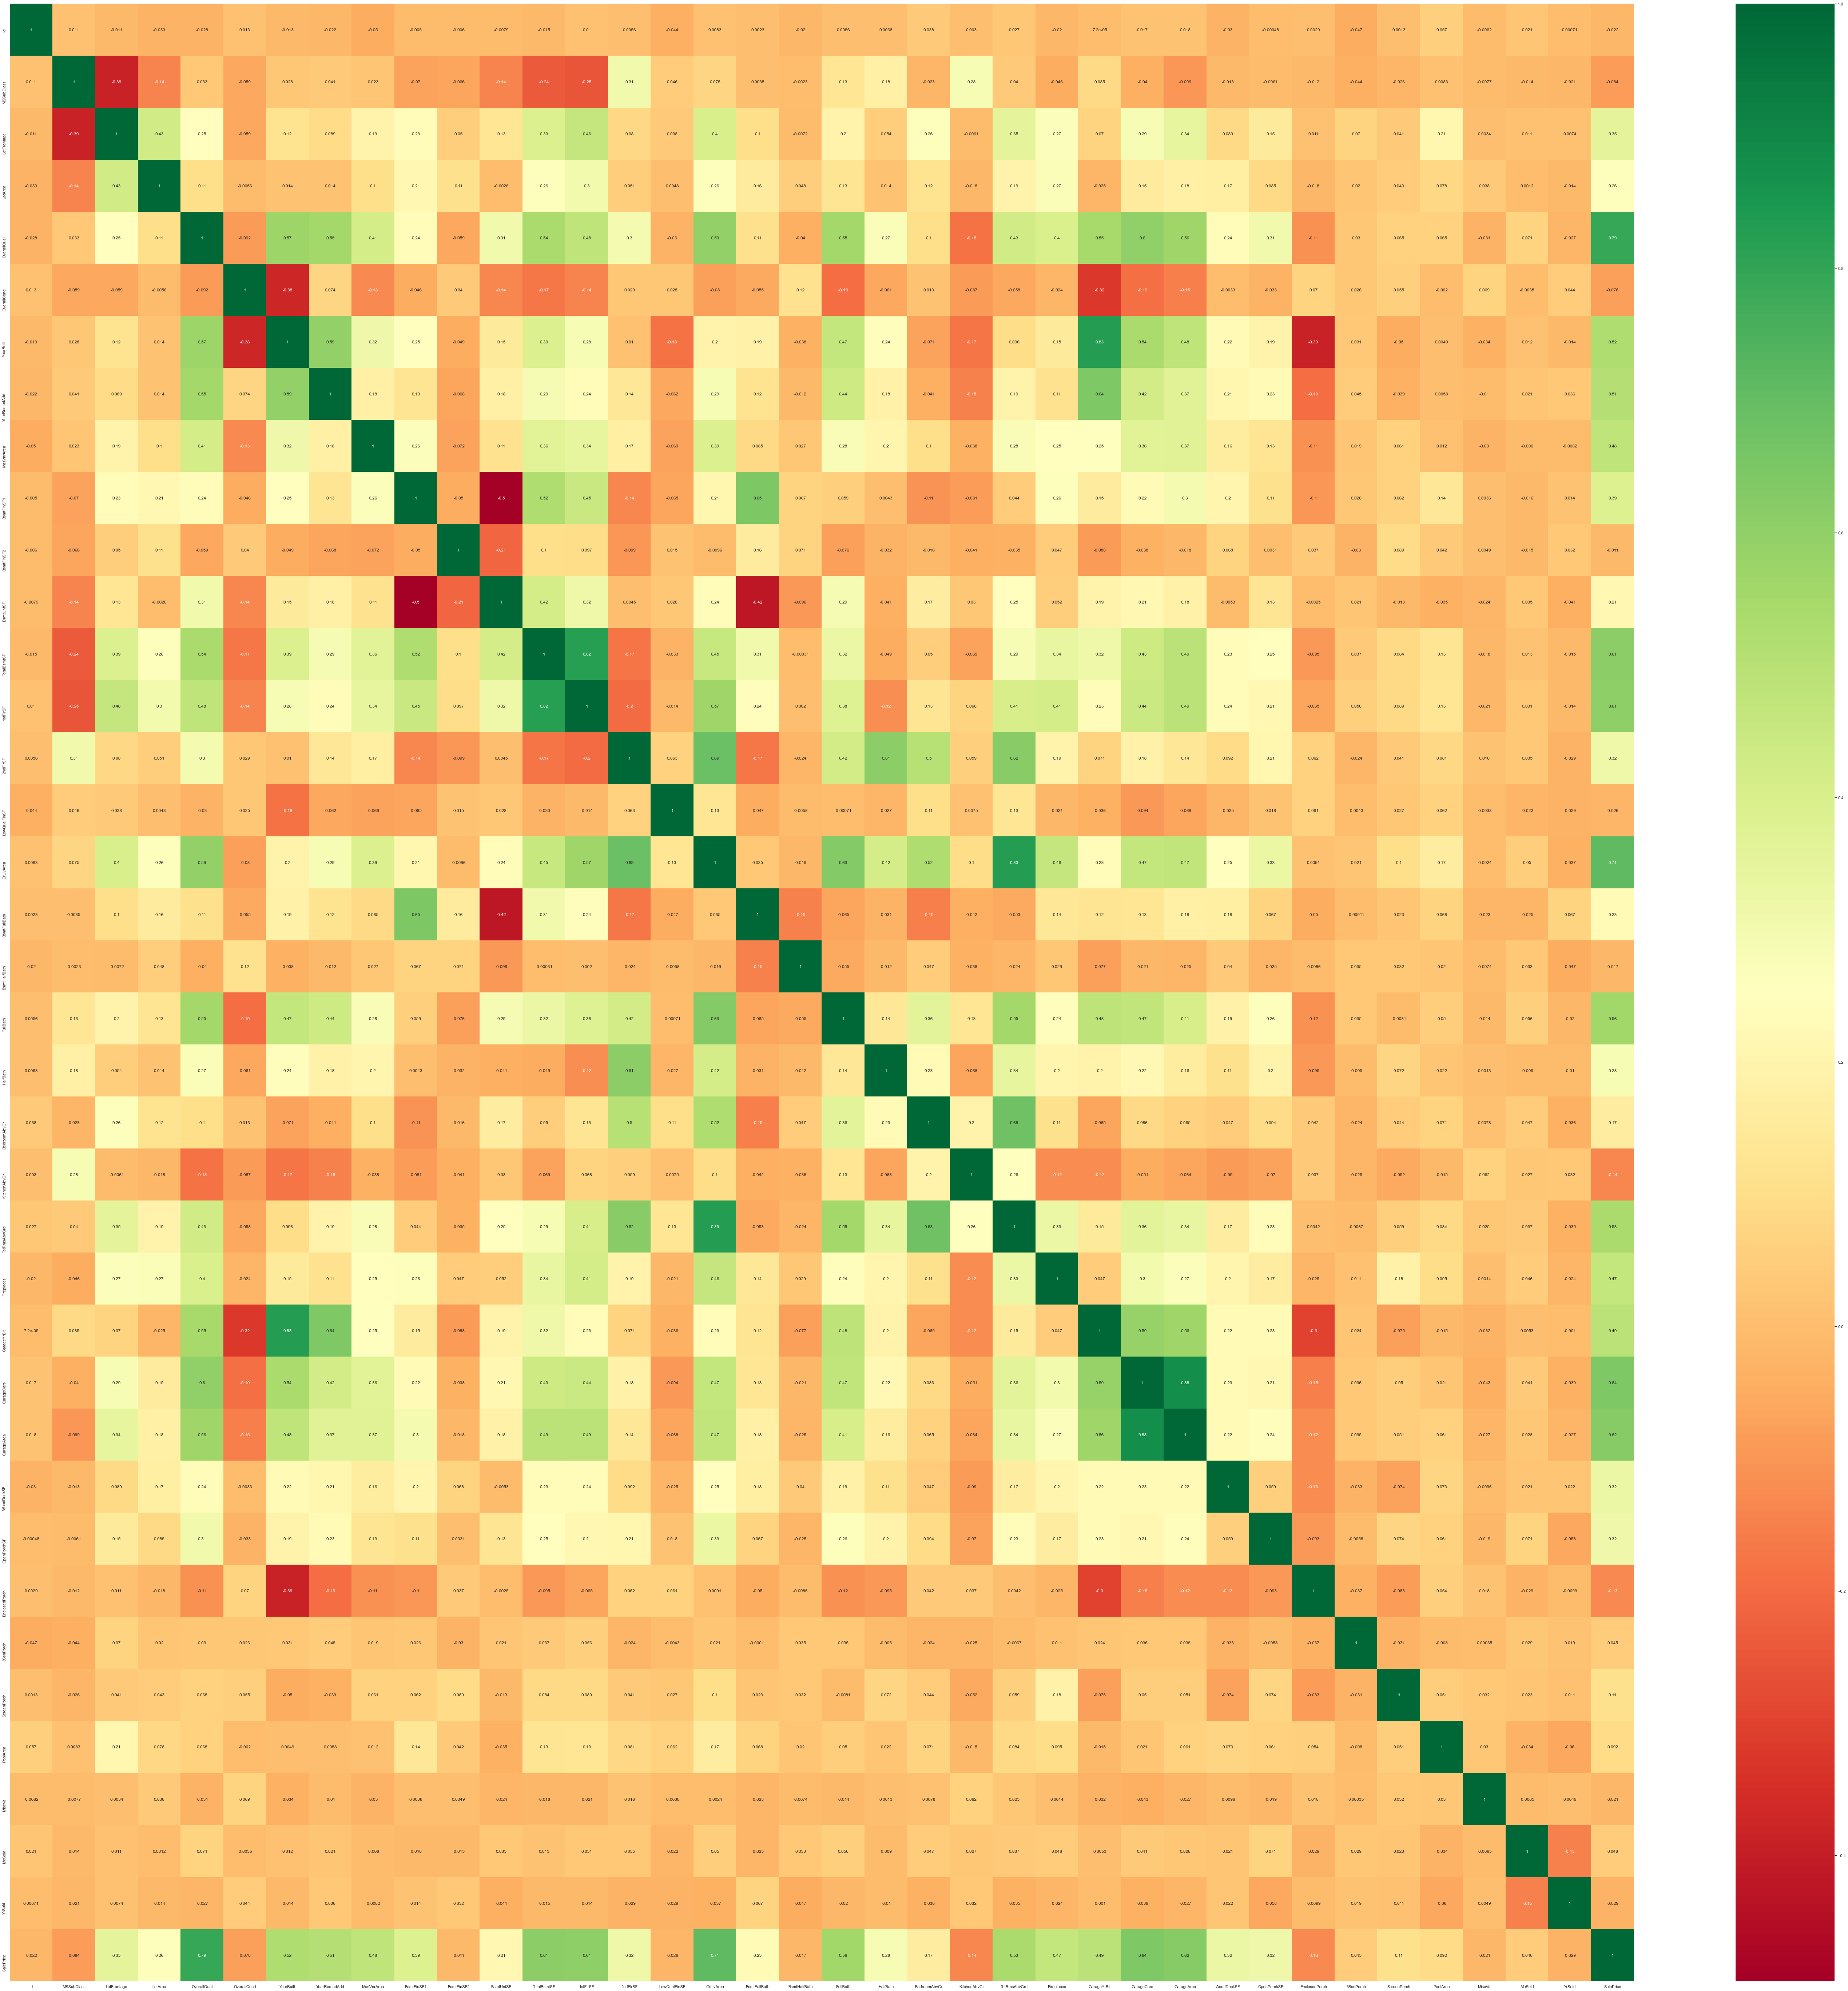

In [13]:
sns.set(rc = {'figure.figsize':(100,100)})
sns.heatmap(train_data.corr(), annot=True, cbar=True, cmap="RdYlGn")

#### Features with higher correlation to SalePrice

In [14]:
saleprice_corr = train_data.corr()["SalePrice"].sort_values(ascending=False)
saleprice_corr = saleprice_corr[saleprice_corr >= 0.5]
saleprice_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

## Data preparation

### Dealing with missing Categorical features

In [15]:
for data in [train_data, test_data]:
    data["Alley"].fillna("NA",inplace=True)
    data["MasVnrType"].fillna("None", inplace=True)
    data["BsmtQual"].fillna("NA",inplace=True)
    data["BsmtCond"].fillna("NA",inplace=True)
    data["BsmtExposure"].fillna("NA",inplace=True)
    data["BsmtFinType1"].fillna("NA",inplace=True)
    data["BsmtFinType2"].fillna("NA",inplace=True)
    data["FireplaceQu"].fillna("NA",inplace=True)
    data["GarageType"].fillna("NA",inplace=True)
    data["GarageFinish"].fillna("NA",inplace=True)
    data["GarageQual"].fillna("NA",inplace=True)
    data["GarageCond"].fillna("NA",inplace=True)
    data["PoolQC"].fillna("NA",inplace=True)
    data["Fence"].fillna("NA",inplace=True)
    data["MiscFeature"].fillna("NA",inplace=True)
    
    mSZoning_mode = str(data["MSZoning"].mode())
    data["MSZoning"].fillna(mSZoning_mode, inplace=True) # fill with most frequent
    electrical_mode = str(data["Electrical"].mode())
    data["Electrical"].fillna(electrical_mode, inplace=True) # fill with most frequent
    utilities_mode = str(data["Utilities"].mode())
    data["Utilities"].fillna(utilities_mode, inplace=True) # fill with most frequent
    exterior1st_mode = str(data["Exterior1st"].mode())
    data["Exterior1st"].fillna(exterior1st_mode, inplace=True) # fill with most frequent
    exterior2nd_mode = str(data["Exterior2nd"].mode())
    data["Exterior2nd"].fillna(exterior2nd_mode, inplace=True) # fill with most frequent
    functional_mode = str(data["Functional"].mode())
    data["Functional"].fillna(functional_mode, inplace=True) # fill with most frequent
    saletype_mode = str(data["SaleType"].mode())
    data["SaleType"].fillna(saletype_mode, inplace=True) # fill with most frequent
    kitchenqual_mode = str(data["KitchenQual"].mode())
    data["KitchenQual"].fillna(kitchenqual_mode, inplace=True) # fill with most frequent

### Dealing with missing Numerical features

Since we havd dealt with all missing categorical features, I will now first deal with all numeric ones

In [16]:
for data in [train_data, test_data]:
    lotFrontage_median = data["LotFrontage"].median()
    data["LotFrontage"].fillna(lotFrontage_median, inplace=True)
    masVnrArea_median = data["MasVnrArea"].median()
    data["MasVnrArea"].fillna(masVnrArea_median, inplace=True)
    garageYrBlt_median = data["GarageYrBlt"].median()
    data["GarageYrBlt"].fillna(garageYrBlt_median, inplace=True)
    bsmtFinSF1_median = data["BsmtFinSF1"].median()
    data["BsmtFinSF1"].fillna(bsmtFinSF1_median, inplace=True)
    bsmtFinSF2_median = data["BsmtFinSF2"].median()
    data["BsmtFinSF2"].fillna(bsmtFinSF2_median, inplace=True)
    bsmtUnfSF_median = data["BsmtUnfSF"].median()
    data["BsmtUnfSF"].fillna(bsmtUnfSF_median, inplace=True)
    bsmtfullBath_median = data["BsmtFullBath"].median()
    data["BsmtFullBath"].fillna(bsmtfullBath_median, inplace=True)
    bsmthalfBath_median = data["BsmtHalfBath"].median()
    data["BsmtHalfBath"].fillna(bsmthalfBath_median, inplace=True)
    garageYrBlt_median = data["GarageYrBlt"].median()
    data["GarageYrBlt"].fillna(garageYrBlt_median, inplace=True)
    garageCars_median = data["GarageCars"].median()
    data["GarageCars"].fillna(garageCars_median, inplace=True)
    garageArea_median = data["GarageArea"].median()
    data["GarageArea"].fillna(garageArea_median, inplace=True)
    totalBsmtSF_median = data["TotalBsmtSF"].median()
    data["TotalBsmtSF"].fillna(totalBsmtSF_median, inplace=True)

### Feature distributions

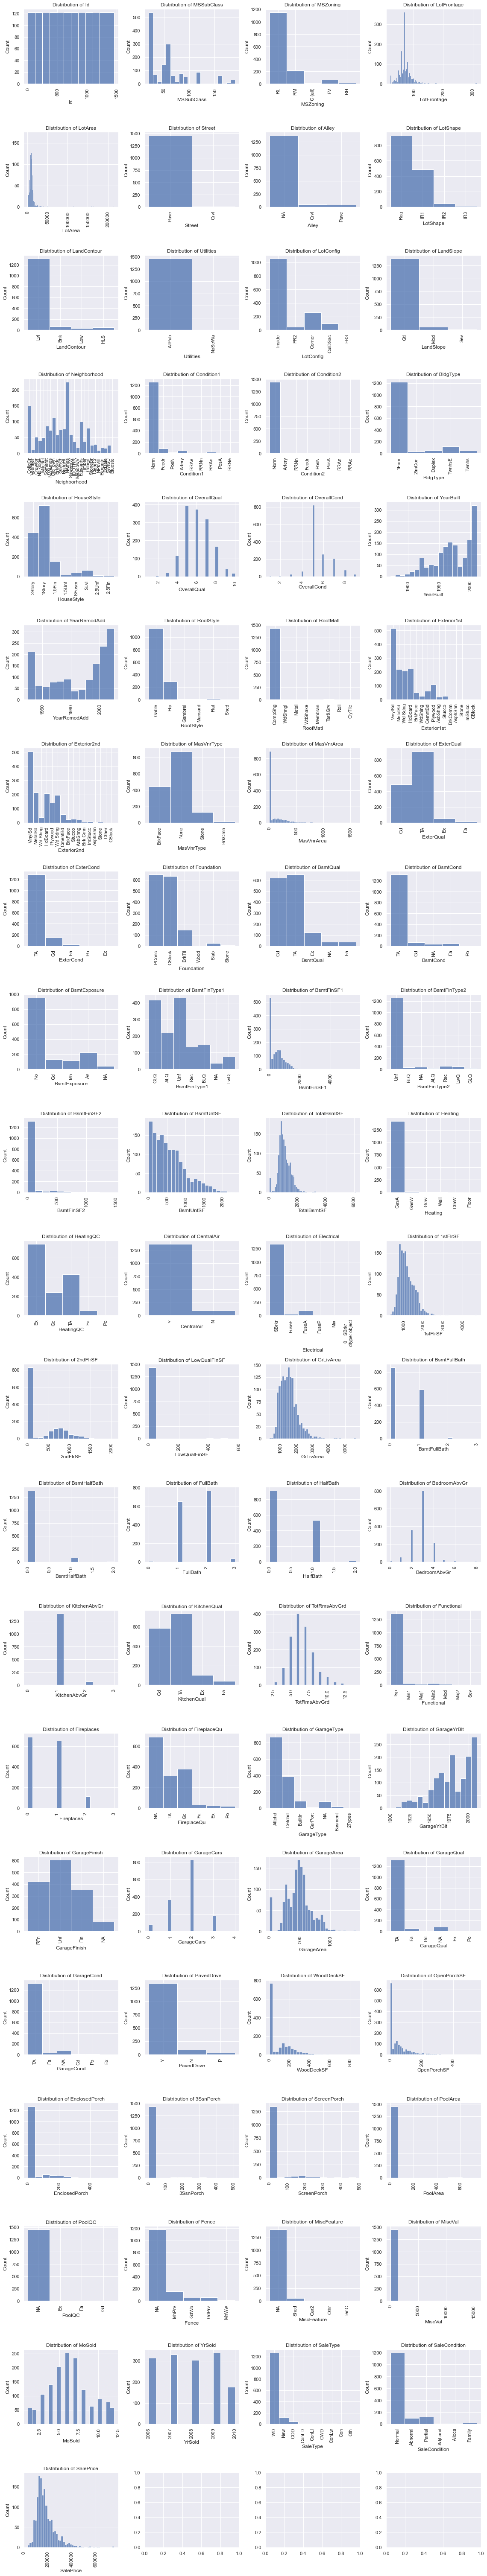

In [17]:
fig, axes = plt.subplots(nrows = 21, ncols = 4, figsize=(16, 84))
axes = axes.ravel()

for index, col in enumerate(train_data.columns):
    sns.histplot(train_data[col], ax = axes[index])
    axes[index].tick_params(axis="x", rotation=90)
    axes[index].set_title("Distribution of %s" %col)

fig.tight_layout()

Encode categorical features

In [18]:
mapping = dict()

numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
object_columns = train_data.select_dtypes(exclude=numerics)

for col_name in object_columns.columns:
    i1 = train_data.columns.get_loc(col_name)
    i2 = train_data.columns.get_loc(col_name)
    mapping[col_name] = dict()
    classes = list(set(list(train_data.iloc[:, i1]) + list(test_data.iloc[:, i2])))
    for j in range(len(classes)):
        mapping[col_name][classes[j]] = j
        
mapping

{'MSZoning': {'RH': 0,
  'FV': 1,
  'RL': 2,
  '0    RL\ndtype: object': 3,
  'RM': 4,
  'C (all)': 5},
 'Street': {'Grvl': 0, 'Pave': 1},
 'Alley': {'Pave': 0, 'NA': 1, 'Grvl': 2},
 'LotShape': {'IR1': 0, 'Reg': 1, 'IR3': 2, 'IR2': 3},
 'LandContour': {'Low': 0, 'Bnk': 1, 'HLS': 2, 'Lvl': 3},
 'Utilities': {'AllPub': 0, '0    AllPub\ndtype: object': 1, 'NoSeWa': 2},
 'LotConfig': {'Inside': 0, 'FR3': 1, 'FR2': 2, 'CulDSac': 3, 'Corner': 4},
 'LandSlope': {'Mod': 0, 'Sev': 1, 'Gtl': 2},
 'Neighborhood': {'MeadowV': 0,
  'Sawyer': 1,
  'Blueste': 2,
  'Blmngtn': 3,
  'SWISU': 4,
  'OldTown': 5,
  'CollgCr': 6,
  'IDOTRR': 7,
  'NAmes': 8,
  'Timber': 9,
  'Gilbert': 10,
  'SawyerW': 11,
  'Edwards': 12,
  'NoRidge': 13,
  'NPkVill': 14,
  'ClearCr': 15,
  'BrDale': 16,
  'NWAmes': 17,
  'Mitchel': 18,
  'BrkSide': 19,
  'Crawfor': 20,
  'Veenker': 21,
  'StoneBr': 22,
  'NridgHt': 23,
  'Somerst': 24},
 'Condition1': {'Artery': 0,
  'RRNn': 1,
  'PosN': 2,
  'Norm': 3,
  'RRAe': 4,
  'F

Apply the encoding

In [19]:
train_data.replace(mapping, inplace = True)
test_data.replace(mapping, inplace = True)

### Feature engineering

- HouseAge - difference between year of selling and year of building
- TotalSize - sum of all house areas

In [20]:
train_data["HouseAge"] = train_data["YrSold"] - train_data["YearBuilt"]
test_data["HouseAge"] = test_data["YrSold"] - test_data["YearBuilt"]

train_data["TotalSquareFeet"] = train_data["TotalBsmtSF"] + train_data["1stFlrSF"] + train_data["2ndFlrSF"]
test_data["TotalSquareFeet"] = test_data["TotalBsmtSF"] + test_data["1stFlrSF"] + test_data["2ndFlrSF"]

### Outlier detection and removal

Removing outliers has proved to not increase the accuracy of the models

In [21]:
numeric_data = train_data[train_data.select_dtypes(include=[np.number]).columns]
z = np.abs(stats.zscore(numeric_data))

train_data_z=train_data.copy()[(z < 12).all(axis=1)]

print('Rows,columns Before removing outliers : ', train_data.shape )
print('Rows,columns After removing outliers : ', train_data_z.shape )

Rows,columns Before removing outliers :  (1460, 83)
Rows,columns After removing outliers :  (1436, 83)


### Final data preparations

In [22]:
Y_train = train_data["SalePrice"].apply(np.log)
X_train = pd.DataFrame(train_data.drop(["Id", "SalePrice"], axis=1))
X_test = pd.DataFrame(test_data.drop(["Id"], axis=1))

# apply logarithm scaling
for data in [X_train, X_test]:
    data["TotalSquareFeet"] = data["TotalSquareFeet"].apply(np.log)
    data["GrLivArea"] = data["GrLivArea"].apply(np.log)
    data["LotArea"] = data["LotArea"].apply(np.log)
    data["LotFrontage"] = data["LotFrontage"].apply(np.log)
    data["1stFlrSF"] = data["1stFlrSF"].apply(np.log)
    
    data["MSSubClass"] = data["MSSubClass"].apply(np.log)
    data["YearRemodAdd"] = data["YearRemodAdd"].apply(np.log)
    data["YearBuilt"] = data["YearBuilt"].apply(np.log)
    data["GarageYrBlt"] = data["GarageYrBlt"].apply(np.log)
    data["MoSold"] = data["MoSold"].apply(np.log)

### Train and test sets

In [23]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,TotalSquareFeet
0,2.995732,0,4.382027,9.360655,1,1,1,3,0,0,...,2,0,2,0,1.791759,2010,9,5,49,7.483244
1,2.995732,2,4.394449,9.565704,1,1,0,3,0,4,...,2,3,3,12500,1.791759,2010,9,5,52,7.885329
2,4.094345,2,4.304065,9.534595,1,1,0,3,0,0,...,2,0,2,0,1.098612,2010,9,5,13,7.846590
3,4.094345,2,4.356709,9.208138,1,1,0,3,0,0,...,2,3,2,0,1.791759,2010,9,5,12,7.835975
4,4.787492,2,3.761200,8.518193,1,1,0,2,0,0,...,2,3,2,0,0.000000,2010,9,5,18,7.847763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.075174,4,3.044522,7.568379,1,1,1,3,0,0,...,2,3,2,0,1.791759,2006,9,5,36,7.401231
1455,5.075174,4,3.044522,7.546446,1,1,1,3,0,0,...,2,3,2,0,1.386294,2006,9,3,36,7.401231
1456,2.995732,2,5.075174,9.903488,1,1,1,3,0,0,...,2,3,2,0,2.197225,2006,9,3,46,7.803027
1457,4.442651,2,4.127134,9.253496,1,1,1,3,0,0,...,2,0,1,700,1.945910,2006,9,5,14,7.540090


In [24]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HouseAge,TotalSquareFeet
0,4.094345,2,4.174387,9.041922,1,1,1,3,0,0,...,2,3,2,0,0.693147,2008,9,5,5,7.850104
1,2.995732,2,4.382027,9.169518,1,1,1,3,0,2,...,2,3,2,0,1.609438,2007,9,5,31,7.833600
2,4.094345,2,4.219508,9.328123,1,1,0,3,0,0,...,2,3,2,0,2.197225,2008,9,5,7,7.903227
3,4.248495,2,4.094345,9.164296,1,1,0,3,0,4,...,2,3,2,0,0.693147,2006,9,3,91,7.813187
4,4.094345,2,4.430817,9.565214,1,1,0,3,0,2,...,2,3,2,0,2.484907,2008,9,5,8,8.114624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,2,4.127134,8.976768,1,1,1,3,0,0,...,2,3,2,0,2.079442,2007,9,5,8,7.863267
1456,2.995732,2,4.442651,9.486076,1,1,1,3,0,0,...,2,0,2,0,0.693147,2010,9,5,32,8.192847
1457,4.248495,2,4.189655,9.109636,1,1,1,3,0,0,...,2,2,1,2500,1.609438,2010,9,5,69,8.158230
1458,2.995732,2,4.219508,9.181632,1,1,1,3,0,0,...,2,3,2,0,1.386294,2010,9,5,60,7.676010


In [25]:
Y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

## Experiments

### Prepare models

In [26]:
models = {
    "RandomForestRegressor" : RandomForestRegressor(),
    "GradientBoostingRegressor" : GradientBoostingRegressor(),
    "ExtraTreesRegressor" : ExtraTreesRegressor(),
    "Lasso" : Lasso(alpha=0.0005,tol=0.001),
    "XGBRegressor" : XGBRegressor()
}

stack = list()
stack.append(("RandomForestRegressor", RandomForestRegressor()))
stack.append(("GradientBoostingRegressor", GradientBoostingRegressor()))
stack.append(("Lasso", Lasso(alpha=0.0005,tol=0.001)))
stack.append(("ExtraTreesRegressor", ExtraTreesRegressor()))
stack.append(("XGBRegressor", XGBRegressor()))

stacked_model = StackingRegressor(estimators = stack,
        final_estimator = LinearRegression(), cv=5, n_jobs=-1)

models["StackingRegressor"] = stacked_model

### Prepare KFold Validation

In [27]:
def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv, n_jobs=-1, error_score="raise")
      
    return scores["test_score"]

In [28]:
scoring_method = make_scorer(lambda prediction, true_target: rmse(true_target, prediction))

print("5 KFold mean accuracy on untuned parameters:\n")
for name, model in models.items():
    print(name)
    metrics_accuracy = k_fold_fit_and_evaluate(X_train, Y_train, model, scoring_method) 
    print("Accuracy_mean:", np.mean(metrics_accuracy))
    print()

5 KFold mean accuracy on untuned parameters:

RandomForestRegressor
Accuracy_mean: 0.021180318934869054

GradientBoostingRegressor
Accuracy_mean: 0.018449982778213317

ExtraTreesRegressor
Accuracy_mean: 0.019170916652643744

Lasso
Accuracy_mean: 0.02203316029569227

XGBRegressor
Accuracy_mean: 0.019897239374230873

StackingRegressor
Accuracy_mean: 0.017734051724247323



### Perform hyper parameter tuning

Prepare parameters

In [41]:
random_state = 42
n_splits = 5
scoring_method = make_scorer(lambda true_target, prediction: rmse(true_target, prediction))

model_parameters = {
    "RandomForestRegressor": {
        'random_state': [random_state],
        'min_samples_leaf' : np.arange(2, 100, 1),
        'min_samples_split' : np.arange(2, 100, 1),
        'max_depth': np.arange(20, 100, 1)
    },
    
    "GradientBoostingRegressor": {
        'random_state': [random_state],
        'min_samples_leaf' : np.arange(2, 100, 1),
        'min_samples_split' : np.arange(2, 100, 1),
        'max_depth': np.arange(20, 100, 1)
    },
    
    "ExtraTreesRegressor": {
        'random_state': [random_state],
        'min_samples_leaf' : np.arange(2, 100, 1),
        'min_samples_split' : np.arange(2, 100, 1),
        'max_depth': np.arange(20, 100, 1)
    }
}

Perform the tuning

In [42]:
bestHyper = dict()
for model_name, parameters in model_parameters.items():
    model = models[model_name]
    
    cv = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)
    rand_search = RandomizedSearchCV(model, parameters, cv=cv, n_jobs=-1, n_iter = 100, verbose=False, scoring=scoring_method).fit(X_train, Y_train)
    
    best_model = rand_search.best_estimator_
    best_score = rand_search.best_score_
    best_params = rand_search.best_params_
    
    bestHyper[model_name] = dict()
    
    for k,v in best_params.items():
        bestHyper[model_name][k] = v
    
    print("Finished with ", model_name)
        
bestHyper

Finished with  RandomForestRegressor
Finished with  GradientBoostingRegressor
Finished with  ExtraTreesRegressor


{'RandomForestRegressor': {'random_state': 42,
  'min_samples_split': 68,
  'min_samples_leaf': 99,
  'max_depth': 73},
 'GradientBoostingRegressor': {'random_state': 42,
  'min_samples_split': 3,
  'min_samples_leaf': 2,
  'max_depth': 69},
 'ExtraTreesRegressor': {'random_state': 42,
  'min_samples_split': 95,
  'min_samples_leaf': 99,
  'max_depth': 64}}

We have now discovered the best hyper parameters for every algorithm. We now fit our data on them and evaluate their performance

In [43]:
hyperModels = {
    "RandomForestRegressor" : RandomForestRegressor(max_depth=bestHyper["RandomForestRegressor"]["max_depth"], min_samples_leaf=bestHyper["RandomForestRegressor"]["min_samples_leaf"], min_samples_split=bestHyper["RandomForestRegressor"]["min_samples_split"], random_state=random_state),
    "GradientBoostingRegressor" : GradientBoostingRegressor(max_depth=bestHyper["GradientBoostingRegressor"]["max_depth"], min_samples_leaf=bestHyper["GradientBoostingRegressor"]["min_samples_leaf"], min_samples_split=bestHyper["GradientBoostingRegressor"]["min_samples_split"], random_state=random_state),
    "ExtraTreesRegressor" : ExtraTreesRegressor(max_depth=bestHyper["ExtraTreesRegressor"]["max_depth"], min_samples_leaf=bestHyper["ExtraTreesRegressor"]["min_samples_leaf"], min_samples_split=bestHyper["ExtraTreesRegressor"]["min_samples_split"], random_state=random_state)
}

stack = list()
stack.append(("RandomForestRegressor", hyperModels["RandomForestRegressor"]))
stack.append(("GradientBoostingRegressor", hyperModels["GradientBoostingRegressor"]))
stack.append(("Lasso", Lasso(alpha=0.0005,tol=0.001, random_state=random_state)))
stack.append(("XGBRegressor", XGBRegressor(colsample_bytree=0.6, gamma=0.4, random_state=random_state)))
stack.append(("ExtraTreesRegressor", hyperModels["ExtraTreesRegressor"]))

stacked_model = StackingRegressor(estimators = stack,
        final_estimator = LinearRegression(), cv=5, n_jobs=-1)

hyperModels["StackingRegressor"] = stacked_model

In [44]:
for item in hyperModels:
    hyperModels[item].fit(X_train, Y_train)

for name, model in hyperModels.items():
    metrics_accuracy = k_fold_fit_and_evaluate(X_train, Y_train, model, scoring_method)
    print("Accuracy_mean of", name, ": ", np.mean(metrics_accuracy))

Accuracy_mean of RandomForestRegressor :  0.041375277731184615
Accuracy_mean of GradientBoostingRegressor :  0.026843598749349558
Accuracy_mean of ExtraTreesRegressor :  0.03683417447307403
Accuracy_mean of StackingRegressor :  0.0199755260061891


StackingRegressor shows the best accuracy

## Predict data

Perform the prediction and save to file

In [45]:
classifier = hyperModels["StackingRegressor"].fit(X_train, Y_train)
result = classifier.predict(X_test)

In [46]:
result = np.exp(result)

In [47]:
output = pd.DataFrame({'Id': test_data["Id"], 'SalePrice': result})
output.to_csv('submission.csv', index=False)

## Final remarks

### Feature Importance

Text(0.5, 1.0, 'Feature Importance')

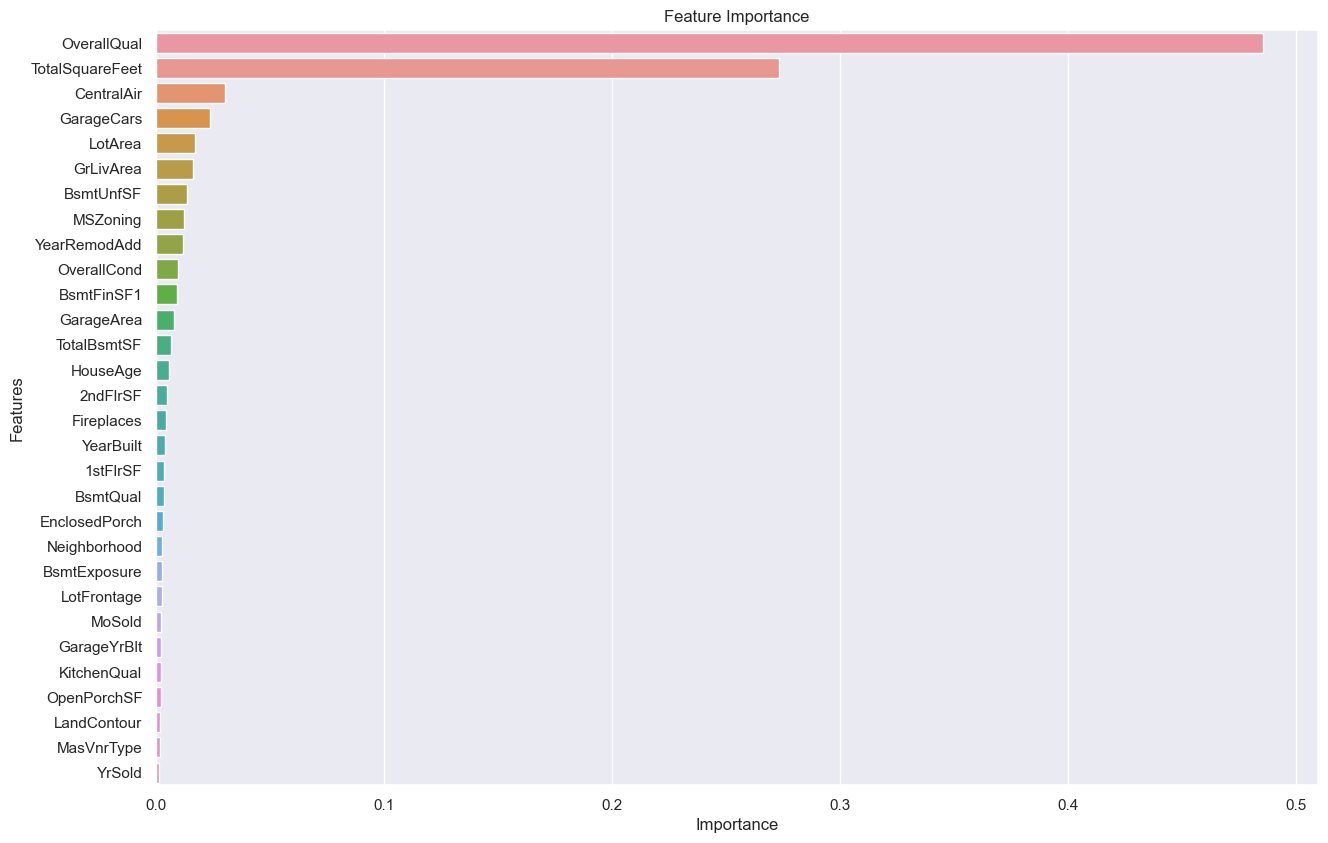

In [48]:
hyperModels["GradientBoostingRegressor"].fit(X_train, Y_train)

FI_df=pd.DataFrame({'Features': X_train.columns, 'Importance': hyperModels["GradientBoostingRegressor"].feature_importances_})
FI_df=FI_df.sort_values(by='Importance', ascending=False).head(100)
plt.figure(figsize=(15,10),dpi=100)
sns.barplot(x=FI_df[:30].Importance,y=FI_df[:30].Features,orient = 'h').set_title('Feature Importance')

Kaggle RMSE achieved: 0.12294